In [1]:
%matplotlib inline

In [2]:
import tensorflow as tf
from tensorflow import keras

/home/ravisher/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/ravisher/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/ravisher/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/ravisher/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.

In [3]:
#1. Load dataset using Keras API
fashion_mnist = keras.datasets.fashion_mnist

In [4]:
#2. split train-test
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [5]:
#3. Describe the data
print('Features: ', X_train_full.shape)
print('Target: ', y_train_full.shape)

Features:  (60000, 28, 28)
Target:  (60000,)


In [6]:
# class_names
class_name = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

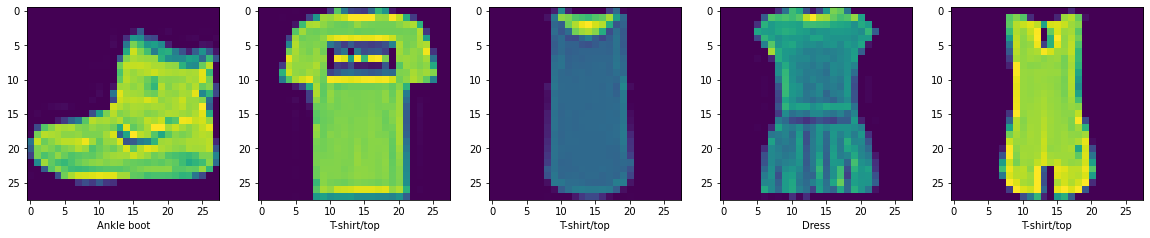

In [7]:
#4. Visualize the data set
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,10))
plt.tight_layout()
for i in range(5):
    image = X_train_full[i]
    plt.subplot(5/5 + 1, 5, i + 1)
    plt.imshow(image)
    plt.xlabel(class_name[y_train_full[i]])
    print()

In [8]:
#5. Scale the input features, since we are going to train the network using Gradient Descent
# we are going to scale down the pixel intensities in range of 0-1 by dividing them with 255.0
X_valid, X_train = X_train_full[:5000]/255, X_train_full[5000:]/255
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [9]:
# Build the model
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.layers

In [12]:
# access layer parameters
weights, biases = model.layers[1].get_weights()
print("Weights:" , weights)
print("Biases: ", biases)

Weights: [[ 0.05522585 -0.00569525 -0.05121108 ... -0.06520756  0.01752687
   0.00891366]
 [-0.00024319  0.01236644 -0.00271558 ...  0.02477407  0.00748412
  -0.042273  ]
 [ 0.03406519 -0.03914959 -0.05433009 ...  0.05435412 -0.0721487
   0.01530457]
 ...
 [ 0.04500626  0.00279979  0.04707503 ... -0.0565834  -0.00013427
   0.05981302]
 [ 0.0418158   0.01735472  0.04852032 ... -0.01811673  0.01597892
  -0.02860479]
 [ 0.04173928 -0.05836955  0.02245002 ... -0.04916986  0.00389259
   0.02889447]]
Biases:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

In [13]:
# Compiling the model
# keras.losses.sparse_categorical_crossentropy
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [14]:
# Fit/Train the model
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/20
55000/55000 [==============================] - 5s 99us/sample - loss: 0.6980 - acc: 0.7716 - val_loss: 0.5105 - val_acc: 0.8266
Epoch 2/20
55000/55000 [==============================] - 5s 97us/sample - loss: 0.4797 - acc: 0.8348 - val_loss: 0.4480 - val_acc: 0.8476
Epoch 3/20
55000/55000 [==============================] - 6s 110us/sample - loss: 0.4368 - acc: 0.8476 - val_loss: 0.4099 - val_acc: 0.8618
Epoch 4/20
55000/55000 [==============================] - 9s 168us/sample - loss: 0.4103 - acc: 0.8559 - val_loss: 0.4275 - val_acc: 0.8522
Epoch 5/20
55000/55000 [==============================] - 6s 116us/sample - loss: 0.3913 - acc: 0.8625 - val_loss: 0.3828 - val_acc: 0.8694
Epoch 6/20
55000/55000 [==============================] - 10s 190us/sample - loss: 0.3770 - acc: 0.8678 - val_loss: 0.3666 - val_acc: 0.8756
Epoch 7/20
55000/55000 [==============================] - 12s 210us/sample - loss: 0.3636 - acc: 0.8723 - val_lo

In [14]:
# Save the model
model.save_weights('apparel_classification_model_wieghts.h5')
model.save('apparel_classification_model.h5')

In [15]:
from sklearn.externals import joblib

# Save to file in the current working directory
joblib_file = "joblib_model.pkl"
joblib.dump(model, joblib_file)

/home/ravisher/.local/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


TypeError: can't pickle _thread.RLock objects

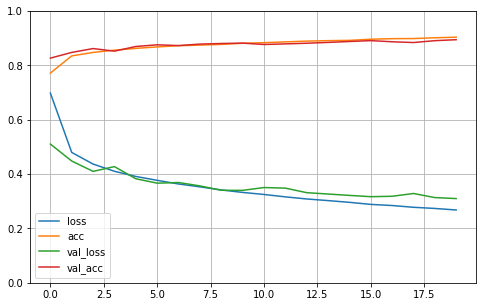

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1) # Set vertical range
plt.show()

In [17]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 59us/sample - loss: 71.9973 - acc: 0.8366


[71.99728902908713, 0.8366]

In [18]:
# Make Predictions using test set
X_predict = X_test[:5]
print(X_predict[0])
y_prediction = model.predict(X_predict)
y_prediction.round(2)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   3   1   0   0   7   0  37   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   1   2   

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [19]:
# Predict classes
import numpy as np
y_predict_class = model.predict_classes(X_predict)
# wrap around class_name
np.array(class_name)[y_predict_class]

array(['Ankle boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt'],
      dtype='<U11')

array(['Bag'], dtype='<U11')

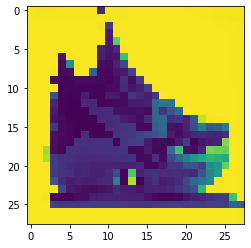

In [21]:
# Predict new images
import os
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, load_img
import cv2
from PIL import Image

dataset_dir = os.path.join('/home/ravisher/Development/AI-Lab', 'Dataset')
apparel_dir = os.path.join(dataset_dir, 'Apparels')
files = [file for file in os.listdir(apparel_dir)]
X = []
for file in files:
    img = os.path.join(apparel_dir, file)
    #X.append(cv2.resize(cv2.imread(img), (28, 28), interpolation=cv2.INTER_CUBIC))
    X.append(cv2.resize(cv2.cvtColor(cv2.imread(img), cv2.COLOR_BGR2GRAY), (28,28)))
X = X[0]/255.0
plt.imshow(X)
y_predict_class = model.predict_classes(X.reshape(1, 28,28))
# wrap around class_name
np.array(class_name)[y_predict_class]